In [0]:
import pandas as pd #lewy ALT + strzałki "chwyta linijkę i przesuwa :D"
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
#y_true = 30
#y_pred = 20

#b1 => 10
#b3 => 15
#b2 => 8

(10 + 8 + 15) / 3 # To z grubsza jest mean_absolute_error

11.0

In [4]:
cd "/content/drive/My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


In [5]:
ls

ColabDriveGithub.ipynb  Day4_meta.ipynb  Untitled0.ipynb
Day4.ipynb              DW.Matrix/       Untitled1.ipynb


In [6]:
cd DW.Matrix/

/content/drive/My Drive/Colab Notebooks/DW.Matrix


In [7]:
ls

data/  HelloGithub.ipynb  LICENSE  Matrix_One/  README.md


In [8]:
ls data

men_shoes.csv  Men_Shoes_Prices.csv


In [11]:
df = pd.read_csv("data/men_shoes.csv", low_memory = False)
df.shape

(18342, 48)

In [12]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [16]:
np.mean(df.prices_amountmin), np.mean(df.prices_amountmax)

(96.24863482716663, 98.81784756296403)

In [19]:
mean_min_price = np.mean(df.prices_amountmin)
mean_max_price = np.mean(df.prices_amountmax)
mean_diff_price = np.mean(df.prices_amountmax - df.prices_amountmin)
mean_max_price - mean_max_price == mean_diff_price

False

In [22]:
mean_max_price, mean_min_price, mean_diff_price, mean_max_price - mean_min_price

(98.81784756296403, 96.24863482716663, 2.5692127357976227, 2.5692127357974073)

In [0]:
y_min_true = df.prices_amountmin
y_max_true = df.prices_amountmax
y_diff_true = df.prices_amountmax - df.prices_amountmin

In [26]:
y_min_true.shape[0]

18342

In [0]:
y_min_pred = [mean_min_price] * y_min_true.shape[0]
y_max_pred = [mean_max_price] * y_max_true.shape[0]
y_diff_pred = [mean_diff_price] * y_diff_true.shape[0]


In [28]:
mean_absolute_error(y_min_true, y_min_pred), mean_absolute_error(y_max_true, y_max_pred), mean_absolute_error(y_diff_true, y_diff_pred)

(67.46755350850002, 69.72090565376891, 4.960902149673416)

In [0]:
filter_max = np.percentile(y_max_true, 99)
filter_min = np.percentile(y_min_true, 99)
filter_diff = np.percentile(y_diff_true, 99)

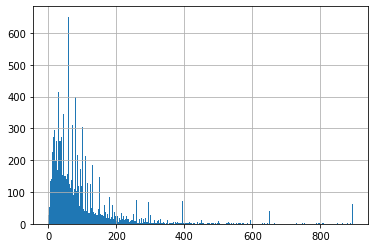

In [32]:
y_min_true.hist(bins = int(filter_min))

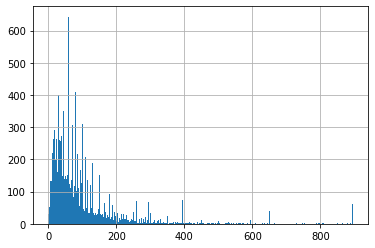

In [33]:
y_max_true.hist(bins = int(filter_max))

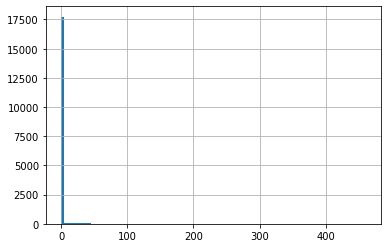

In [50]:
y_diff_true.hist(bins = int(filter_diff))

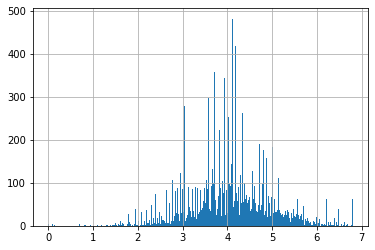

In [54]:
np.log1p(y_min_true).hist(bins = int(filter_min))

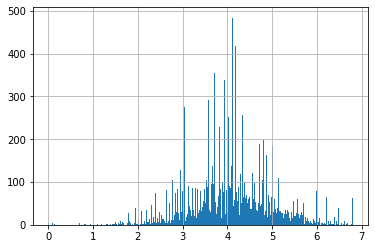

In [55]:
np.log1p(y_max_true).hist(bins = int(filter_max))

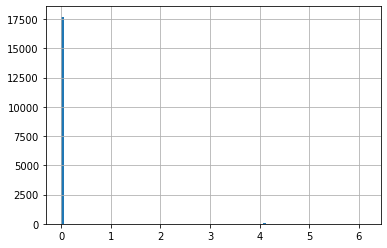

In [56]:
np.log1p(y_diff_true).hist(bins = int(filter_diff)) #log1p(x) := log(x + 1)

In [61]:
y_prime_min_pred_med = [np.median(y_min_true)] * y_min_true.shape[0]
mean_absolute_error(y_min_true, y_prime_min_pred_med)

60.62082978955403

In [62]:
y_prime_max_pred_med = [np.median(y_max_true)] * y_max_true.shape[0]
mean_absolute_error(y_max_true, y_prime_max_pred_med)

62.58738959764476

In [63]:
y_prime_diff_pred_med = [np.median(y_diff_true)] * y_diff_true.shape[0]
mean_absolute_error(y_diff_true, y_prime_diff_pred_med)

2.5692127357976227

In [64]:
price_min_log_mean = np.expm1(np.mean(np.log1p(y_min_true)))
y_prime_min_pred = [price_min_log_mean] * y_min_true.shape[0] # exp1m1 <--- exp - 1
mean_absolute_error(y_min_true, y_prime_min_pred)

60.63914228110542

In [65]:
price_max_log_mean = np.expm1(np.mean(np.log1p(y_max_true)))
y_prime_max_pred = [price_max_log_mean] * y_max_true.shape[0]
mean_absolute_error(y_max_true, y_prime_max_pred)

62.58898859607169

In [66]:
price_min_log_mean = np.expm1(np.mean(np.log1p(y_diff_true)))
y_prime_diff_pred = [price_min_log_mean] * y_diff_true.shape[0]
mean_absolute_error(y_diff_true, y_prime_diff_pred)

2.6990818428032495

In [67]:
mean_absolute_error(y_min_true, y_min_pred), mean_absolute_error(y_max_true, y_max_pred), mean_absolute_error(y_diff_true, y_diff_pred)

(67.46755350850002, 69.72090565376891, 4.960902149673416)

In [68]:
mean_absolute_error(y_min_true, y_prime_min_pred_med), mean_absolute_error(y_max_true, y_prime_max_pred_med), mean_absolute_error(y_diff_true, y_prime_diff_pred_med)

(60.62082978955403, 62.58738959764476, 2.5692127357976227)

In [69]:
mean_absolute_error(y_min_true, y_prime_min_pred), mean_absolute_error(y_max_true, y_prime_max_pred), mean_absolute_error(y_diff_true, y_prime_diff_pred)

(60.63914228110542, 62.58898859607169, 2.6990818428032495)

In [70]:
df.columns #Wygląda na to, że kolumna z marką jest istotna. Cena bowiem często jest związana z marką. Im bardziej znana, prestiżowa marka, tym bardziej wywindowana cena.

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [71]:
df.brand.factorize() #Dlaczego indeksy się powtarzają?

(array([  0,   0,   1, ..., 411, 411, 411]),
 Index(['Josmo', 'SERVUS BY HONEYWELL', 'NATIVE', 'MAUI AND SONS', 'Twisted X',
        'Lacoste', 'Rubies', 'unbranded', 'PUMA', 'Filament',
        ...
        'Bindi', 'Holloway Sportswear', 'River City', 'AH by Android Homme',
        'SEG', 'American Rag', 'BININBOX', 'HEAD', 'Swix', 'Xray, XRay'],
       dtype='object', length=1856))

In [99]:
df.manufacturer.factorize()

(array([-1, -1, -1, ..., -1, -1, -1]),
 Index(['Maui And Sons', 'Twisted X', 'Puma', 'Filament', 'Robert Wayne',
        'Roper', 'Puentes Denver', 'Elan Polo', 'SoftScience', 'Dr. Martens',
        ...
        'MF Western', 'Luxottica', 'Minav Corp.', 'Rainbow Sandals',
        'Muck Boots', 'AH by Android Homme', 'Rubies Costume Co', 'Vasque',
        'POLO Ralph Lauren', 'HEAD'],
       dtype='object', length=618))

In [0]:
df["brand_cat"] = df.brand.factorize()[0]

In [0]:
df["manufacturer_cat"] = df.manufacturer.factorize()[0]

In [91]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [0]:
#feats = ["brand_cat"]
def run_model(feats):
  X = df[feats].values
  Y_min = df.prices_amountmin.values
  Y_max = df.prices_amountmax.values
  Y_diff = (df.prices_amountmax - df.prices_amountmin).values

  model = DecisionTreeRegressor(max_depth = 5)

  scores_min = cross_val_score(model, X, Y_min, scoring = 'neg_mean_absolute_error')
  scores_max = cross_val_score(model, X, Y_max, scoring = 'neg_mean_absolute_error')
  scores_diff = cross_val_score(model, X, Y_diff, scoring = 'neg_mean_absolute_error')

  return (np.mean(scores_min), np.std(scores_min)), (np.mean(scores_max), np.std(scores_max)), (np.mean(scores_diff), np.std(scores_diff)) 

In [96]:
run_model(["brand_cat"])

((-59.66740722193515, 5.86318651440948),
 (-61.68259868400014, 5.784198797762558),
 (-4.078417995138692, 1.406484258303736))

In [103]:
run_model(["manufacturer_cat"])

((-67.13899470956127, 5.757914408838504),
 (-69.30581475613911, 5.769647011762908),
 (-4.83105054469493, 1.1328626583521892))

In [104]:
run_model(["brand_cat", "manufacturer_cat"])

((-59.74945987811775, 5.944944292685725),
 (-61.74159634906297, 5.661449723467824),
 (-4.122829273748864, 1.38373007355296))

In [0]:
df.to_csv('data/Men_Shoes_Prices_brands_manufactures.csv', index = False)

In [0]:
!git add Matrix_One/Day4.ipynb

In [119]:
!git commit -m "Read Men's Shoe Prices dataset from data.world and easy machine learning model"

[master b6c7e5b] Read Men's Shoe Prices dataset from data.world and easy machine learning model
 1 file changed, 1 insertion(+)
 create mode 100644 Matrix_One/Day4.ipynb


In [0]:
!git config --global user.email "urbas.kamil@gmail.com"
!git config --global user.name "Kamil"

In [120]:
!git push -u origin master

fatal: could not read Password for 'https://957f7437ac028fc1f5c07db08ee5d28acbdf7744@github.com': No such device or address


In [121]:
drive.mount("/content/drive")

NameError: ignored